### **About Dataset**  
Content:  
The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are meantemp, humidity, wind_speed, meanpressure.  

Acknowledgements  
This dataset has been collected from Weather Undergroud API. Dataset ownership and credit goes to them.

In [49]:
import pandas as pd
import numpy as np 

train_path = '../Datasets/DailyDelhiClimateTrain.csv'
df = pd.read_csv(train_path)

df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [50]:
df.isnull().any()

date            False
meantemp        False
humidity        False
wind_speed      False
meanpressure    False
dtype: bool

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1462.0,25.495521,7.348103,6.000000,18.857143,27.714286,31.305804,38.714286
humidity,1462.0,60.771702,16.769652,13.428571,50.375000,62.625000,72.218750,100.000000
wind_speed,1462.0,6.802209,4.561602,0.000000,3.475000,6.221667,9.238235,42.220000
meanpressure,1462.0,1011.104548,180.231668,-3.041667,1001.580357,1008.563492,1014.944901,7679.333333


### **Preprocessing**  
You may thinking what can we do to time series data as preprocessing.  
We should set our `date` columns format to *"Pandas date time"*  
And we can split our `date` variable like weekly daily etc. and we can examine that too.  

In [52]:
df2 = df.copy()

df2['date'] = pd.to_datetime(df2['date'])
df2['weekly'] = df2['date'].dt.to_period('W').dt.to_timestamp() # Weekly
df2['monthly'] = df2['date'].dt.to_period('M').dt.to_timestamp() # Monthly
df2['quarterly'] = df2['date'].dt.to_period('Q').dt.to_timestamp() # Quarter

df2.head()

,date,meantemp,humidity,wind_speed,meanpressure,weekly,monthly,quarterly
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2012-12-31,2013-01-01,2013-01-01
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2012-12-31,2013-01-01,2013-01-01
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2012-12-31,2013-01-01,2013-01-01
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2012-12-31,2013-01-01,2013-01-01
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2012-12-31,2013-01-01,2013-01-01


### **Moving Average**  
#### What is Scalping?  
Scalping is a trading style that specializes in profiting off of small price changes and making a fast profit off reselling. In day trading, scalping is a term for a strategy to prioritize making high volumes off small profits.  
  
But we will use the scalping *(Moving Average)* on this project as a trend decisive.  
I mean if the main target is going above the scalping that mean our target is in the uptrend, otherwise if the target value is keep going below the scalping that means the target is in the downtrend.  
  
Essentially our purpose must be stopped the trend and analyze the series but before then lets do theese are and keep exploring the dataset.

In [145]:
rolling_window = 7

df2 = df2.sort_values(by='date', ascending=True)

df2['meantemp_MA'] = df2['meantemp'].rolling(window=rolling_window).mean()
df2['humidity_MA'] = df2['humidity'].rolling(window=rolling_window).mean()
df2['wind_speed_MA'] = df2['wind_speed'].rolling(window=rolling_window).mean()
df2['meanpressure_MA'] = df2['meanpressure'].rolling(window=rolling_window).mean()

df2 = df2.replace(np.nan, 0)
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure,weekly,monthly,quarterly,meantemp_MA,humidity_MA,wind_speed_MA,meanpressure_MA
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2012-12-31,2013-01-01,2013-01-01,0.0,0.0,0.0,0.0
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2012-12-31,2013-01-01,2013-01-01,0.0,0.0,0.0,0.0
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2012-12-31,2013-01-01,2013-01-01,0.0,0.0,0.0,0.0
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2012-12-31,2013-01-01,2013-01-01,0.0,0.0,0.0,0.0
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2012-12-31,2013-01-01,2013-01-01,0.0,0.0,0.0,0.0


### **Visualization Exploring**  
Time series graphs, also called time series charts or time series plots, are probably the most common data visualization instrument used to illustrate data points at a temporal scale where each point corresponds to both time and the unit of measurement.  

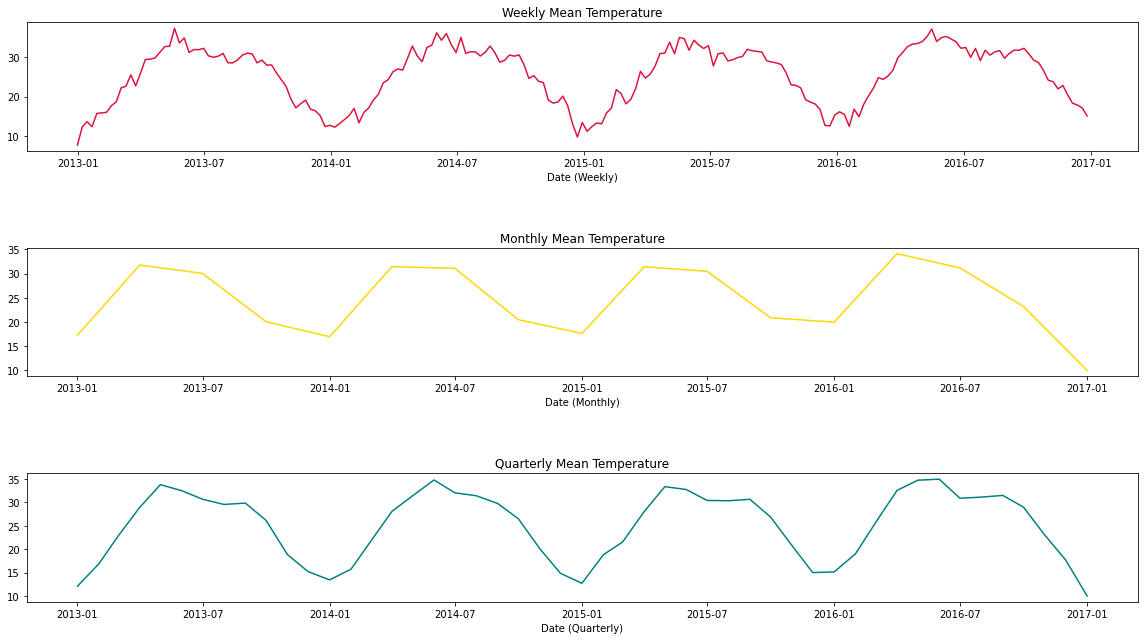

In [146]:
import matplotlib.pyplot as plt

%matplotlib inline

weekly = pd.DataFrame(df2.groupby('weekly')['meantemp'].mean())
monthly = pd.DataFrame(df2.groupby('quarterly')['meantemp'].mean())
quarterly = pd.DataFrame(df2.groupby('monthly')['meantemp'].mean())

fig, ax = plt.subplots(figsize=(16,9), nrows=3)
ax[0].plot(weekly.index, weekly.meantemp, label='Weekly Mean Temperature', color='crimson')
ax[1].plot(monthly.index, monthly.meantemp, label='Weekly Mean Temperature', color='gold')
ax[2].plot(quarterly.index, quarterly.meantemp, label='Weekly Mean Temperature', color='teal')

ax[0].set_xlabel('Date (Weekly)')
ax[1].set_xlabel('Date (Monthly)')
ax[2].set_xlabel('Date (Quarterly)')

ax[0].set_title('Weekly Mean Temperature')
ax[1].set_title('Monthly Mean Temperature')
ax[2].set_title('Quarterly Mean Temperature')

fig.tight_layout(h_pad=5)
fig.savefig('../Images/plot_mean_temp_per_dates')
plt.show()

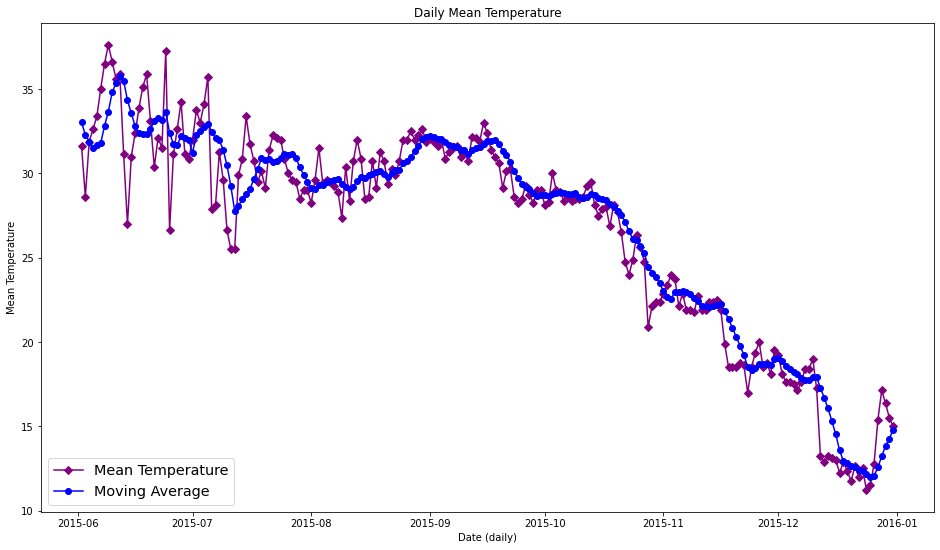

In [156]:
%matplotlib inline

df_temp = df2[(df2['date'] > '2015-06-01') & (df['date'] < '2016')]

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df_temp['date'], df_temp['meantemp'], marker='D', color='purple', label='Mean Temperature')
ax.plot(df_temp['date'], df_temp['meantemp_MA'], marker='o', color='blue', label='Moving Average')
ax.set_xlabel('Date (daily)')
ax.set_ylabel('Mean Temperature')
ax.set_title('Daily Mean Temperature')
ax.legend(loc='lower left', fontsize='x-large')

fig.savefig('../Images/plot_daily_mean_temperature_ma.png')
plt.show()

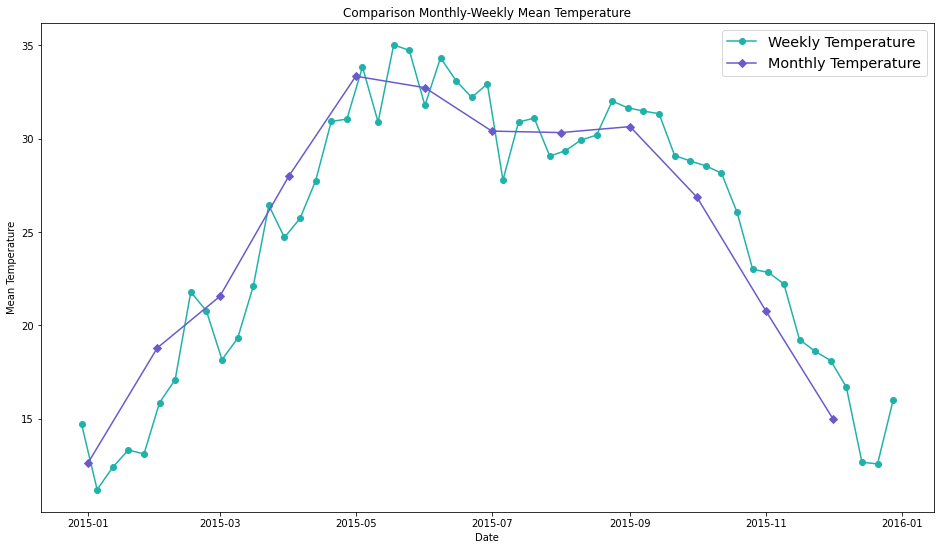

In [165]:
df_temp = df2[(df2['date'] > '2015-01-01') & (df['date'] < '2016-01-01')]

weekly = pd.DataFrame(df_temp.groupby('weekly')['meantemp'].mean())
monthly = pd.DataFrame(df_temp.groupby('monthly')['meantemp'].mean())

%matplotlib inline

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(weekly.index, weekly.iloc[:,0], marker='o', color='lightseagreen', label='Weekly Temperature')
ax.plot(monthly.index, monthly.iloc[:,0], marker='D', color='slateblue', label='Monthly Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature')
ax.set_title('Comparison Monthly-Weekly Mean Temperature')
ax.legend(loc='upper right', fontsize='x-large')

fig.savefig('../Images/plot_monthly_weekly_comparison.png')
plt.show()

### **Correlation**  
Correlation is a statistical measure that expresses the extent to which two variables are linearly related.  
  
**Weekly Correlations:**

In [123]:
pd.options.plotting.backend = "plotly"

corr_df = df2.groupby('weekly').agg({
    'meantemp': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'meanpressure': 'mean'
})

corr_df.corr(method='spearman')

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.594825,0.521591,-0.856333
humidity,-0.594825,1.000000,-0.508478,0.312652
wind_speed,0.521591,-0.508478,1.000000,-0.458956
meanpressure,-0.856333,0.312652,-0.458956,1.000000


**Monthly Correlations:**

In [124]:
corr_df = df2.groupby('monthly').agg({
    'meantemp': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'meanpressure': 'mean'
})

corr_df.corr(method='spearman')

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.629898,0.761020,-0.819592
humidity,-0.629898,1.000000,-0.636939,0.378878
wind_speed,0.761020,-0.636939,1.000000,-0.584286
meanpressure,-0.819592,0.378878,-0.584286,1.000000


**Quarterly Correlations:** 

In [125]:
corr_df = df2.groupby('quarterly').agg({
    'meantemp': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'meanpressure': 'mean'
})

corr_df.corr(method='spearman')

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.781863,0.811275,-0.803922
humidity,-0.781863,1.000000,-0.651961,0.370098
wind_speed,0.811275,-0.651961,1.000000,-0.674020
meanpressure,-0.803922,0.370098,-0.674020,1.000000
